<strong>DSCI 100 Group Project Proposal</strong> <br>
testing title 2 change
Athan Mellios <br>
Aviva Mei <br>
Alvin Zhou <br>
Richard Luo <br>

In [95]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [3]:

temp <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip",temp)

#Reading the data in R
facebook <- read_csv2(unz(temp, "dataset_Facebook.csv"))
head(facebook)
unlink(temp)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  `Page total likes` = col_double(),
  Type = col_character(),
  Category = col_double(),
  `Post Month` = col_double(),
  `Post Weekday` = col_double(),
  `Post Hour` = col_double(),
  Paid = col_double(),
  `Lifetime Post Total Reach` = col_double(),
  `Lifetime Post Total Impressions` = col_double(),
  `Lifetime Engaged Users` = col_double(),
  `Lifetime Post Consumers` = col_double(),
  `Lifetime Post Consumptions` = col_double(),
  `Lifetime Post Impressions by people who have liked your Page` = col_double(),
  `Lifetime Post reach by people who like your Page` = col_double(),
  `Lifetime People who have liked your Page and engaged with your post` = col_double(),
  comment = col_double(),
  like = col_double(),
  share = col_double(),
  `Total Interactions` = col_double()
)



Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100
139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164
139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80
139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777
139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393
139441,Status,2,12,1,9,0,10472,20849,1191,1073,1389,16034,7852,1016,1,152,33,186


<strong>Introduction:</strong> <br>


<strong>Preliminary Exploratory Data Analysis:</strong> <br>

<strong>Methods:</strong> <br>

<strong>Expected outcomes and significance:</strong> <br>

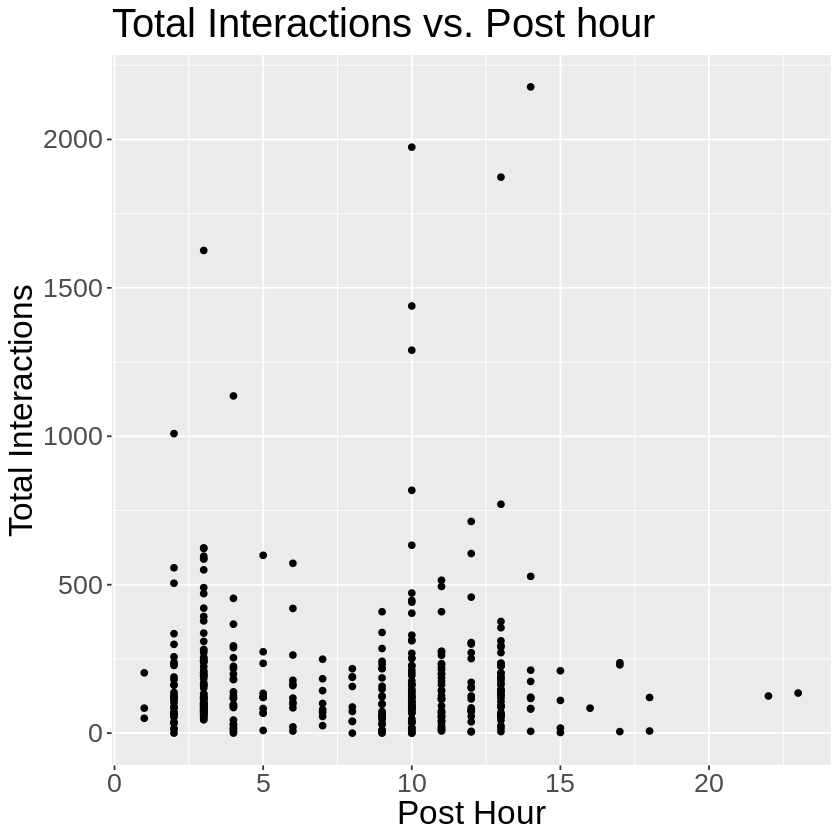

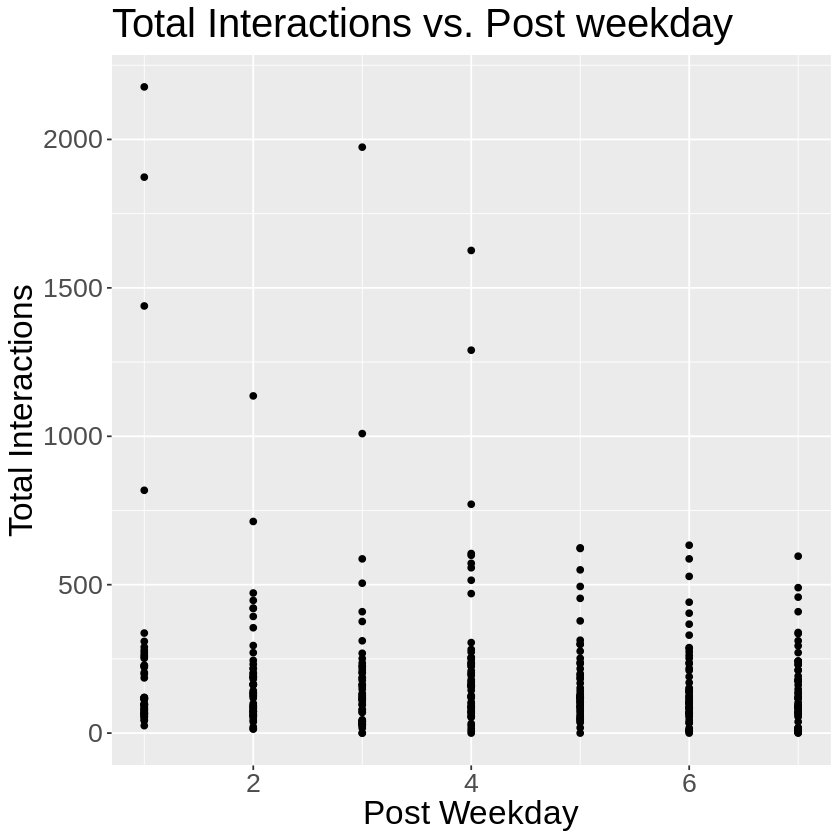

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



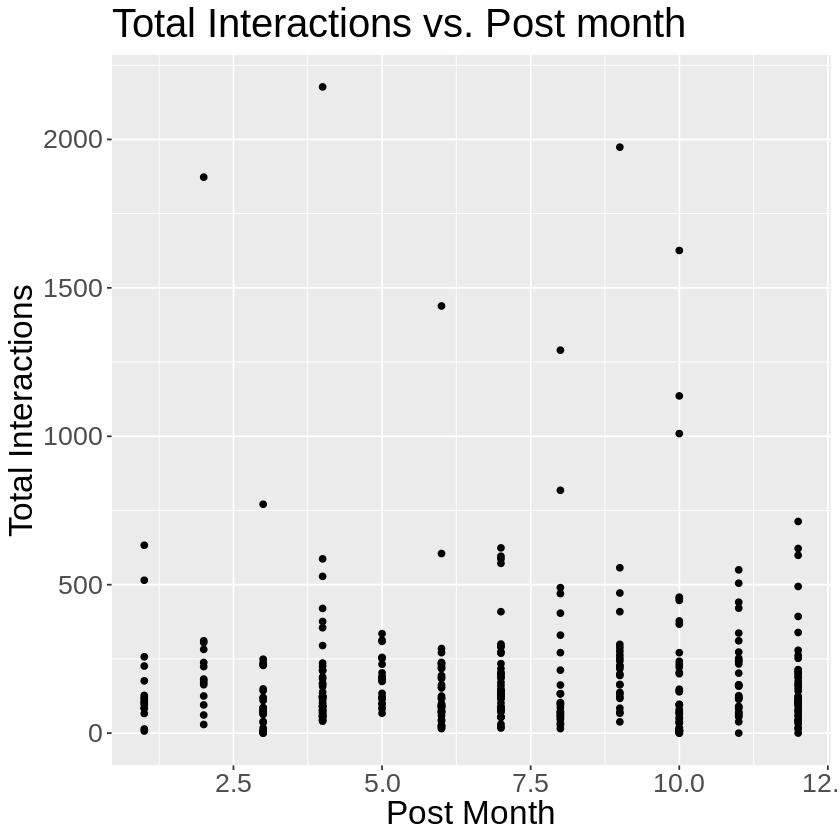

Page total likes,Type,Category,Total Interactions,average_total_interactions
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
132817,Photo,3,1290,194.141
123047,Photo,3,1439,194.141
137020,Photo,2,1626,194.141
92507,Photo,3,1873,194.141
135428,Photo,1,1974,194.141
111620,Photo,3,2177,194.141


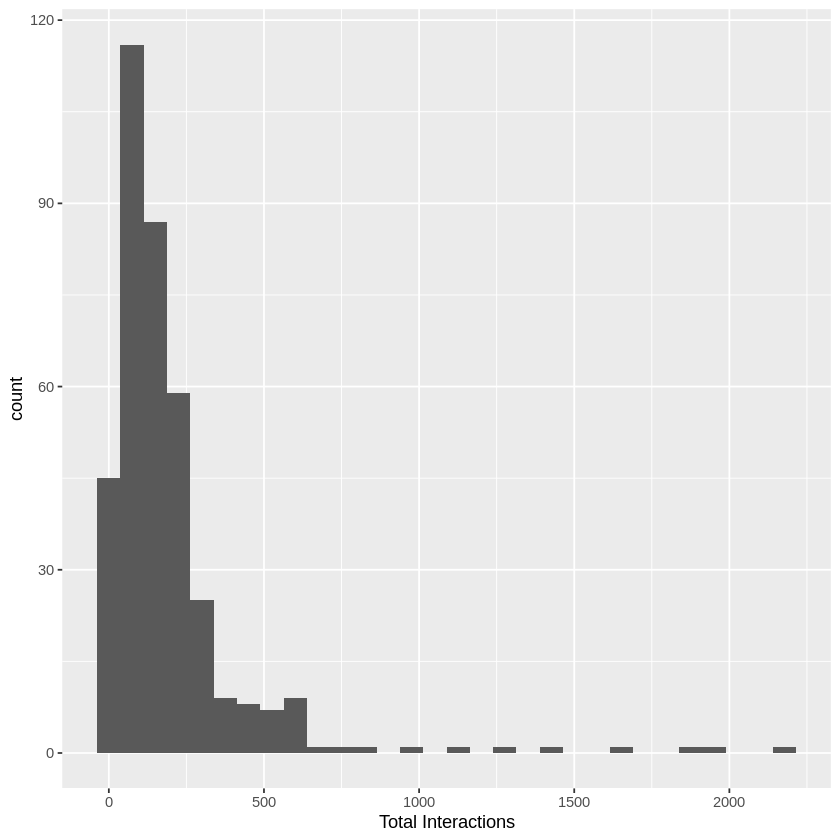

In [78]:
set.seed(1)                      

#Split into training (75 percent of data set) and test data
facebook_split <- initial_split(facebook, prop = 0.75, strata = `Total Interactions`)
facebook_train <- training(facebook_split)
facebook_test <- testing(facebook_split)

#Filter Outliers
facebook_train_filter <- filter(facebook_train, `Total Interactions` < 5000)

#ScatterPlot for Total Interactions Every Hour
facebook_plot = ggplot(data = facebook_train_filter, aes(x = `Post Hour`, y = `Total Interactions`)) +
    geom_point() +
    labs(title = "Total Interactions vs. Post hour") +
    theme(text = element_text(size = 20))
facebook_plot

#ScatterPlot for Total Interactions Every Weekday
facebook_plot2 = ggplot(data = facebook_train_filter, aes(x = `Post Weekday`, y = `Total Interactions`)) +
    geom_point() +
    labs(title = "Total Interactions vs. Post weekday") +
    theme(text = element_text(size = 20))
facebook_plot2

#Plot for Total Interactions Every Month
facebook_plot3 = ggplot(data = facebook_train_filter, aes(x = `Post Month`, y = `Total Interactions`)) +
    geom_point() +
    labs(title = "Total Interactions vs. Post month") +
    theme(text = element_text(size = 20))
facebook_plot3

#Distribution of Total Interactions
distribution_histogram <- ggplot(facebook_train_filter1, aes(x = `Total Interactions`)) +
                          geom_histogram(position = "identity")
distribution_histogram

#Min, Max, and Average of Total Interactions
min_interactions <- min(facebook_train_filter[["Total Interactions"]])
max_interactions <- max(facebook_train_filter[["Total Interactions"]])
average_interactions <- mean(facebook_train_filter[["Total Interactions"]])

#Total Number of Observations
observation_total <- nrow(facebook_train_filter)

#Total Number of Variables
variable_total <- ncol(facebook_train_filter)

#Exploratory Data Analysis Table
fb_test_table = facebook_train_filter %>%
    mutate(facebook_train_filter, average_total_interactions = results) %>%
    select(`Page total likes`, Type, Category, `Total Interactions`, average_total_interactions) %>% 
    arrange(`Total Interactions`)
tail(fb_test_table)

In [80]:
sd(facebook_train_filter)

ERROR: Error in is.data.frame(x): 'list' object cannot be coerced to type 'double'


In [90]:
interactions_only  <- select(facebook_train_filter, `Total Interactions`)
interactions_only
devation <- skewness(interactions_only)

Total Interactions
<dbl>
100
164
393
⋮
84
115
119


ERROR: Error in skewness(interactions_only): could not find function "skewness"


In [92]:
?skewness

skewness {timeDate},R Documentation
na.rm,a logical. Should missing values be removed?
method,"a character string which specifies the method of computation. These are either ""moment"" or ""fisher"" The ""moment"" method is based on the definitions of skewnessfor distributions; these forms should be used when resampling (bootstrap or jackknife). The ""fisher"" method correspond to the usual ""unbiased"" definition of sample variance, although in the case of skewness exact unbiasedness is not possible."
x,a numeric vector or object.
...,arguments to be passed.


In [96]:
library()

R packages available

Packages in library ‘/opt/conda/lib/R/library’:

askpass                 Safe Password Entry for R, Git, and SSH
assertthat              Easy Pre and Post Assertions
backports               Reimplementations of Functions Introduced Since
                        R-3.0.0
base                    The R Base Package
base64enc               Tools for base64 encoding
bit                     Classes and Methods for Fast Memory-Efficient
                        Boolean Selections
bit64                   A S3 Class for Vectors of 64bit Integers
bitops                  Bitwise Operations
blob                    A Simple S3 Class for Representing Vectors of
                        Binary Data ('BLOBS')
brew                    Templating Framework for Report Generation
broom                   Convert Statistical Objects into Tidy Tibbles
callr                   Call R from R
caret                   Classification and Regression Training
cellranger              Translate Spread